In [1]:
from model.HailNet import HailNet, train, test
from src.data_processing import get_traindl, get_testdl
from torch.optim import Adam, SGD
import torch
from model.losses import EVL

In [2]:
num_epochs = 10
feature_names = ["mean_2m_air_temperature", "surface_pressure", "total_precipitation"]
n = len(feature_names)
long = 234
lat = 346
gru_hidden_size = 16 * 16
gru_hidden_layers = 1


model = HailNet(n, long, lat, gru_hidden_size, gru_hidden_layers)
train_dl = get_traindl((2001, 2005), feature_names, "data/Tambov")
loss_fn = EVL(10, 0.9, 0.1)
#opt_sgd = SGD(model.parameters(), lr=0.01, momentum=0.1)
opt_adam = Adam(model.parameters(), lr=0.1)

#losses_sgd = train(num_epochs, model, loss_fn, opt_sgd, train_dl)
losses_adam = train(num_epochs, model, loss_fn, opt_adam, train_dl)

Epoch: 0 | Loss: 7.592605106765404e-05
Epoch: 1 | Loss: 0.002066482789814472
Epoch: 2 | Loss: 0.026105906814336777
Epoch: 3 | Loss: 0.009210691787302494
Epoch: 4 | Loss: 0.011369030922651291
Epoch: 5 | Loss: 0.013920529745519161
Epoch: 6 | Loss: 0.011501847766339779
Epoch: 7 | Loss: 0.01258082129061222
Epoch: 8 | Loss: 0.012471531517803669
Epoch: 9 | Loss: 0.012249906547367573


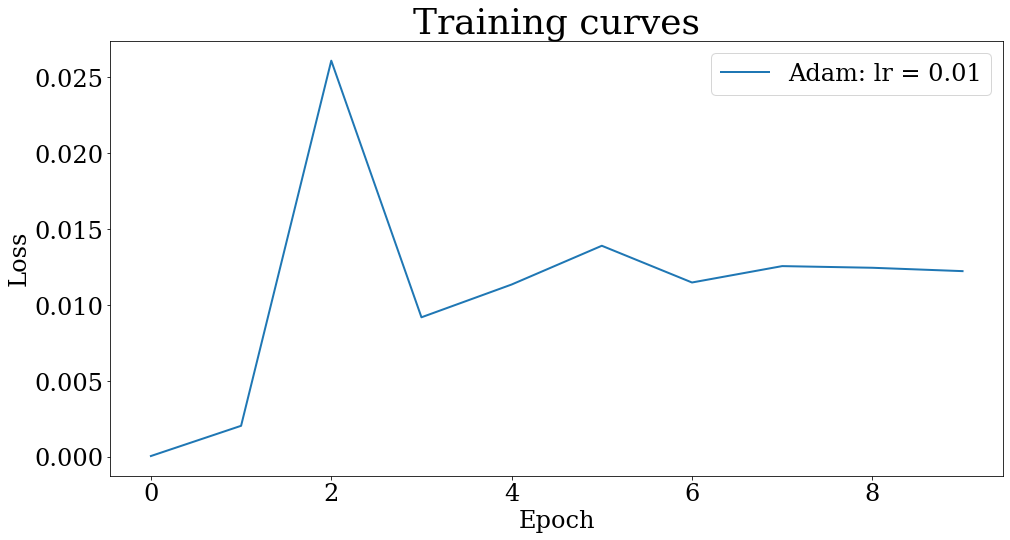

In [4]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

plt.figure(figsize = (16,  8))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training curves")
plt.plot(losses_adam, label = "Adam: lr = 0.01")
#plt.plot(losses_sgd, label = "SGD: lr = 0.01, momentum = 0.1")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, classification_report
test_dl = get_testdl((2006, 2007), feature_names, "data/Tambov")
preds, trues = test(model, test_dl, ["accuracy"], {"accuracy": accuracy_score})
print(preds)
preds = torch.cat(preds)
trues = torch.cat(trues)
threshold = 0.5
for i in range(preds.shape[0]):
    if preds[i].item() < threshold:
        preds[i] = torch.Tensor([0])

[tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]]), tensor([[0.2677]])]


In [6]:
print(classification_report(trues, preds, target_names=["No Hail", "Hail"]))

              precision    recall  f1-score   support

     No Hail       0.92      1.00      0.96        11
        Hail       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [7]:
trues

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])